# Processing GOCCP files
Initial test of computing time and file dimensions.

## Largely new metric testing

### Add paths to run locally or off NIRD

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Try to get this to work!

In [3]:
os.listdir(case_dir)

['20200502_214847_singleparam_cam61_arctic2satcomp_wbf_0.2_inp_0.2',
 '20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1',
 '20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',
 '20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10',
 '20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',
 '20200414_205148_singleparam_cam61satcomp_wbf_0.2_inp_0.3',
 '20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1',
 'unused',
 '20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1',
 '20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',
 'CESM2_slfvars']

In [4]:
basemetric = SatComp_Metric(case_dir)
# mainmetric.add_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1') # origin point

basemetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric.add_case('CESM2_slfvars', label="CAM6")
basemetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.


In [5]:
basemetric_slf = CT_SLF_Metric(case_dir)

basemetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric_slf.add_case('CESM2_slfvars', label="CAM6")
basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CAM6-Oslo <xarray.DataArray (isotherms_mpc: 9)>
array([ 5.71446608, 30.7600886 , 51.22905719, 73.57281282, 88.14830662,
       94.78347731, 97.91280393, 99.70964812, 99.95695943])
Coordinates:
  * isotherms_mpc  (isotherms_mpc) float64 233.1 238.1 243.1 ... 268.1 273.1
<xarray.DataArray (isotherms_mpc: 9)>
array([ 0.94211706,  6.03472599,  8.87886714, 14.68135481, 25.36185538,
       41.80293665, 61.56543928, 79.48311835, 90.67667567])
Coordinates:
  * isotherms_mpc  (isotherms_mpc) float64 233.1 238.1 243.1 ... 268.1 273.1
CAM6 <xarray.DataArray (isotherms_mpc: 9)>
array([12.58903346, 57.63335989, 73.32928398, 82.29537572, 89.50185516,
       94.2915928 , 97.351148  , 99.37741209, 99.92106397])
Coordinates:
  * isotherms_mpc  (isotherms_mpc) float64 233.1 238.1 243.1 ... 268.1 273.1
<xarray.DataArray (isotherms_mpc: 9)>
array([ 1.29917928, 11.76948093, 18.52016529, 24.26051007, 31.91782075,
       41.11269992, 54.05602055, 69.89953603, 85.6232512 ])
Coordinates:
  * isotherms_mpc  (is

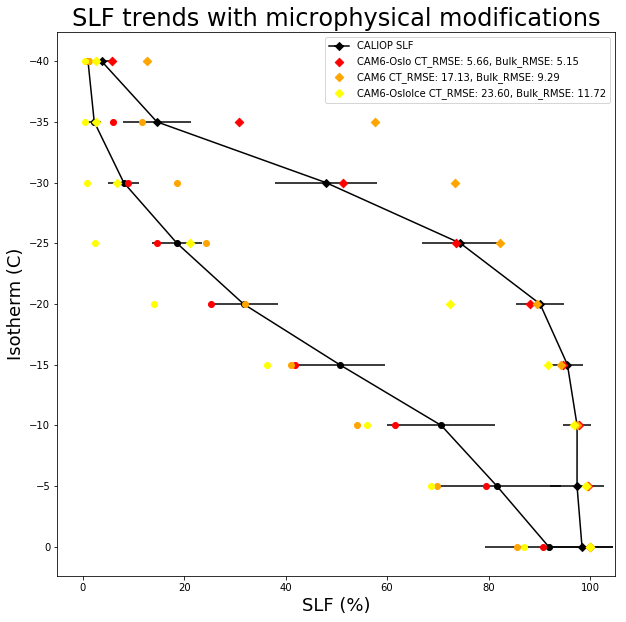

In [6]:
fig3 = basemetric_slf.plot_isos_all()

In [40]:
filename = 'base_slfcurves.png'
filename
if not os.path.exists(filename):
    fig3.savefig(output_dir + filename,format = 'png', dpi = 200)
    fig3.clf()

In [16]:
fitmetric = SatComp_Metric(case_dir)

fitmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
# fitmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.


In [17]:
fitmetric_slf = CT_SLF_Metric(case_dir)

fitmetric_slf.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo Fit 1')
fitmetric_slf.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce Fit 2')
# fitmetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce Fit 2')
fitmetric_slf.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce Fit 3')

Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


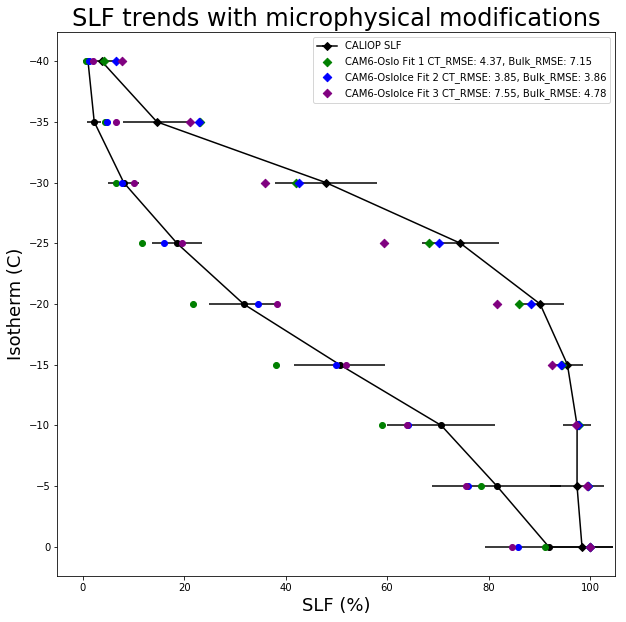

In [18]:
fig4 = fitmetric_slf.plot_isos_all()

In [49]:
filename = 'fit_slfcurves2.png'
filename
if not os.path.exists(filename):
    fig4.savefig(output_dir + filename,format = 'png', dpi = 200)
    fig4.clf()

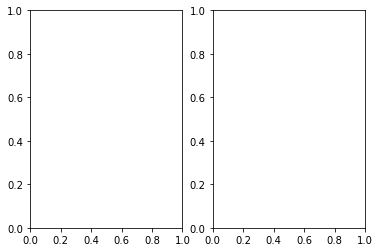

In [26]:
combi = plt.subplots(1,2)
ax1 = fig3.axes
ax2 = fig4.axes
combi[1][0] = ax1
combi[1][1] = ax2

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

op
op
op


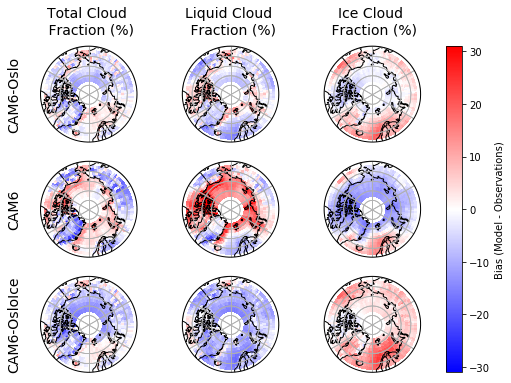

In [18]:
fig1 = basemetric.plot2D('CLDTOT_CAL',projection='Arctic',bias=True,layers=True)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

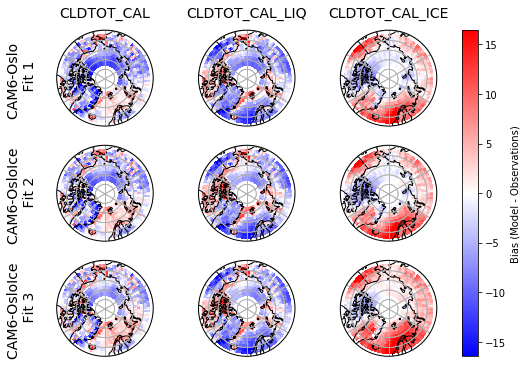

In [37]:
fig2 = fitmetric.plot2D('CLDTOT_CAL',projection='Arctic',bias=True,layers=True)

In [38]:
filename = 'fit_cldtotbias_arctic2.png'
filename
if not os.path.exists(filename):
    fig2.savefig(output_dir + filename,format = 'png', dpi = 200)
    fig2.clf()

In [58]:
filename = 'cam6osloice_circleplot.png'
filename
if not os.path.exists(filename):
    fig5[2].savefig(output_dir + filename,format = 'png', dpi = 200)
    fig5[2].clf()

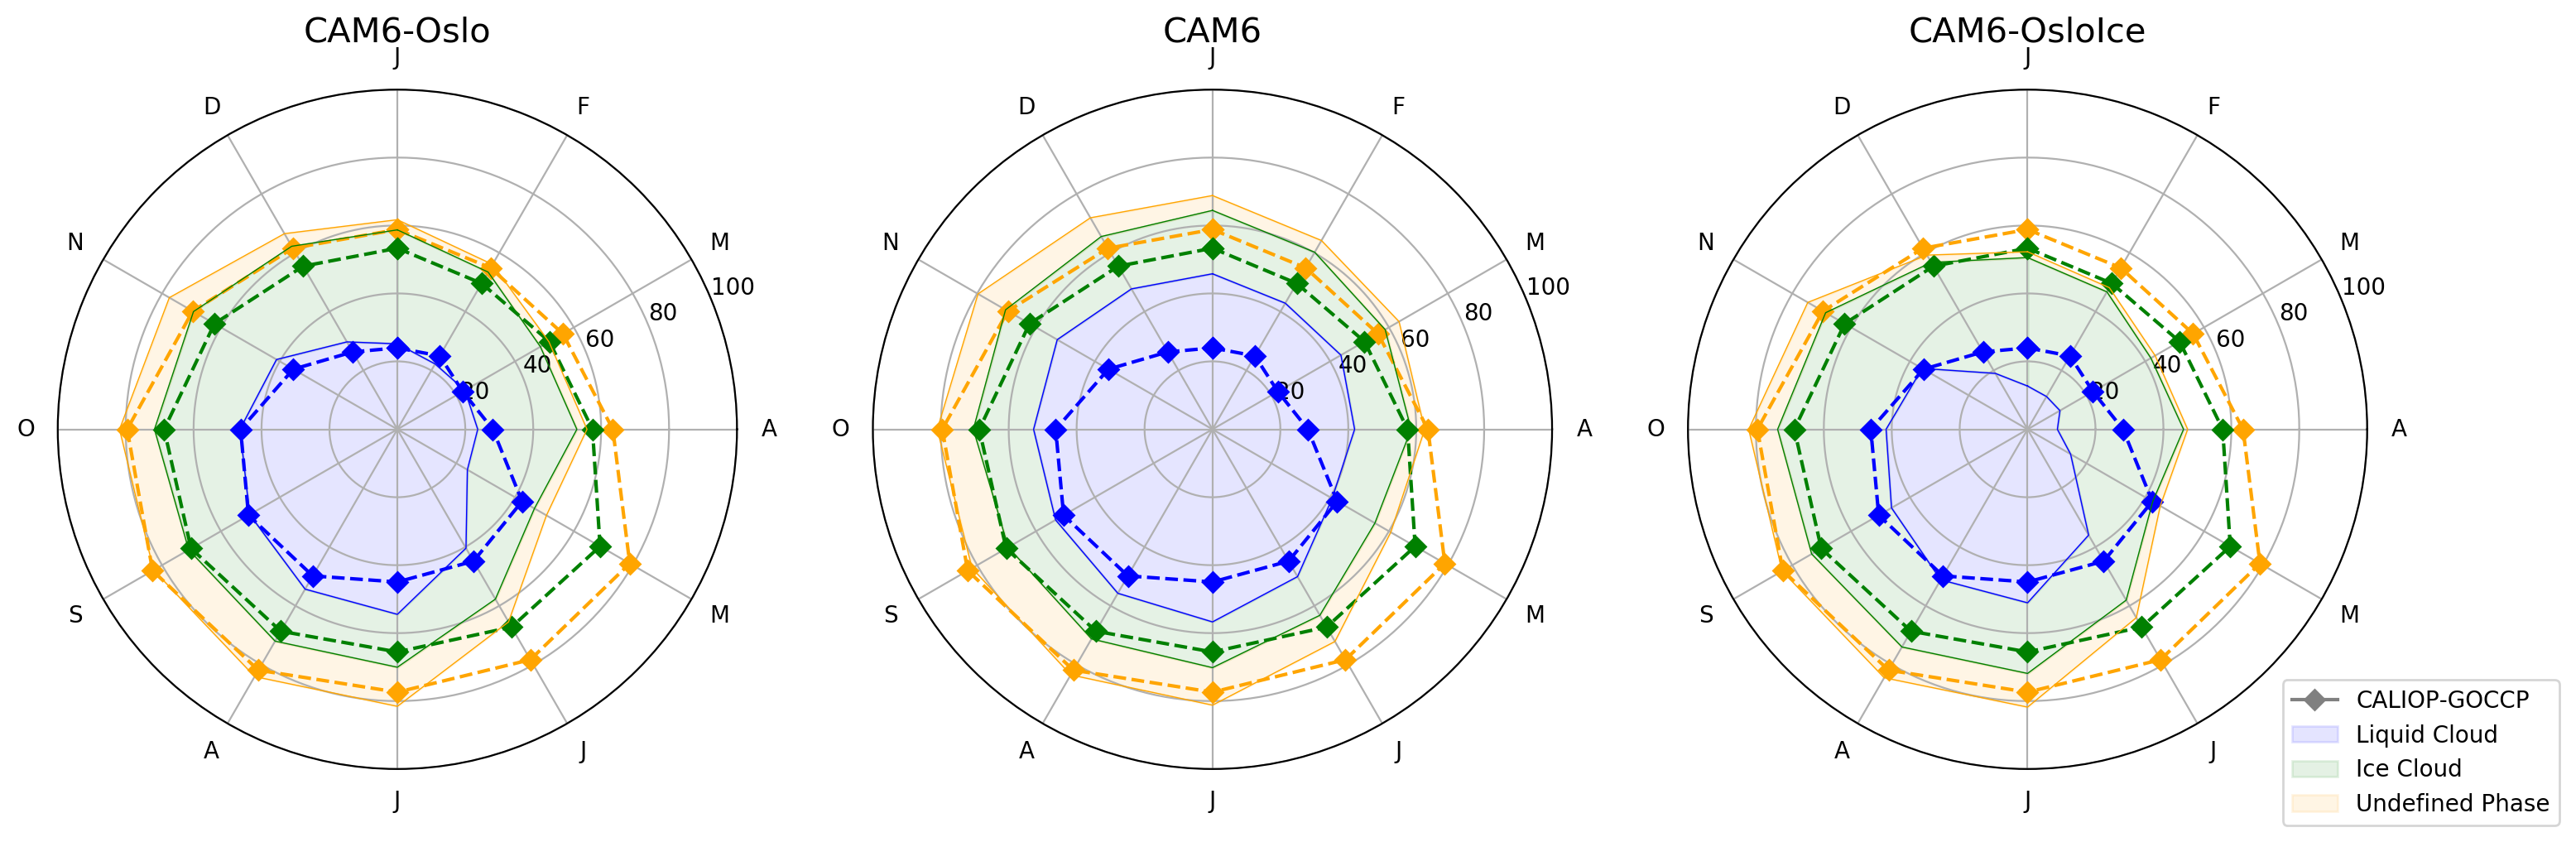

In [51]:
fig5 = basemetric.cloud_polar_plot()

In [52]:
filename = 'base_circleplots.png'
filename
if not os.path.exists(filename):
    fig5.savefig(output_dir + filename,format = 'png', dpi = 200)
    fig5.clf()

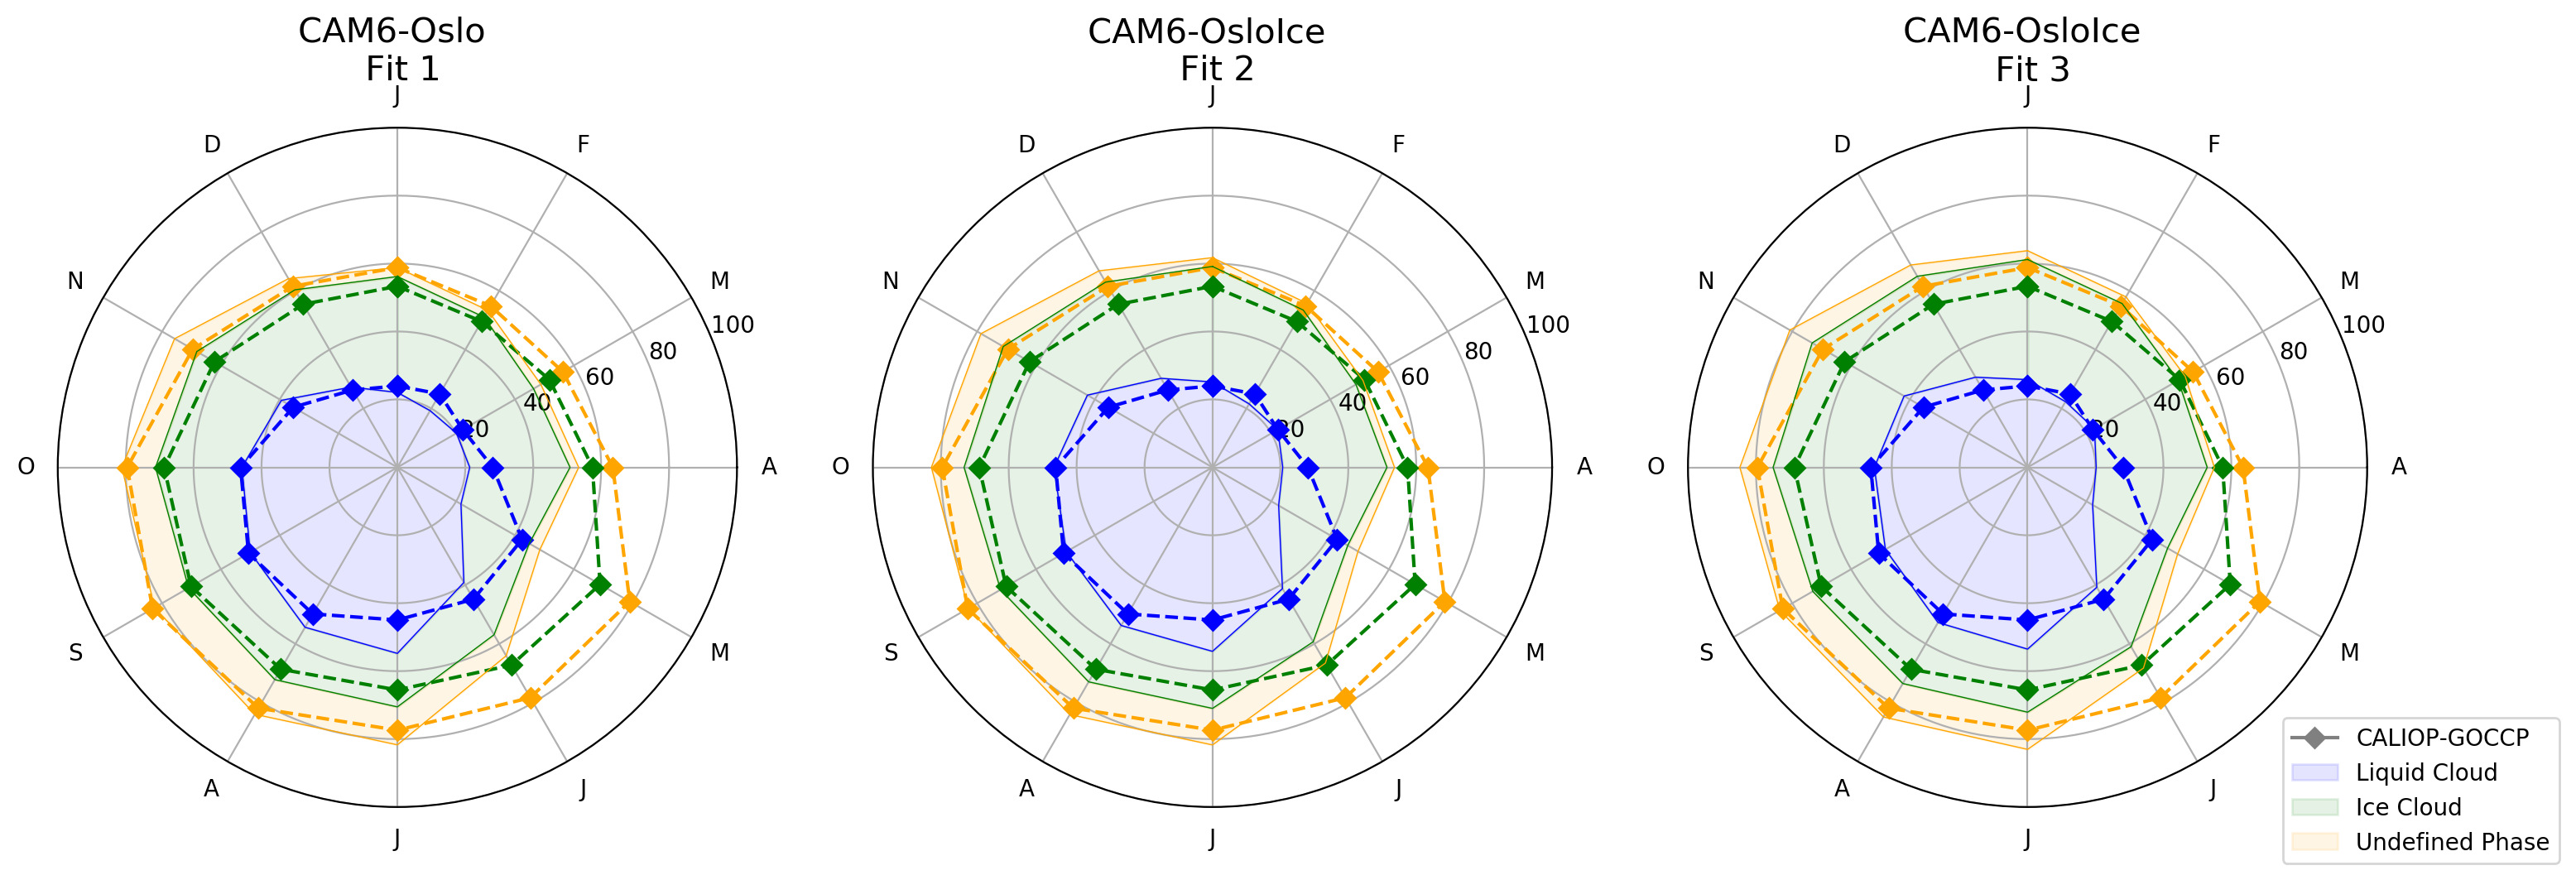

In [35]:
fig6 = fitmetric.cloud_polar_plot()

In [27]:
fig6 = fitmetric.cloud_polar_plot()

NameError: name 'fitmetric' is not defined

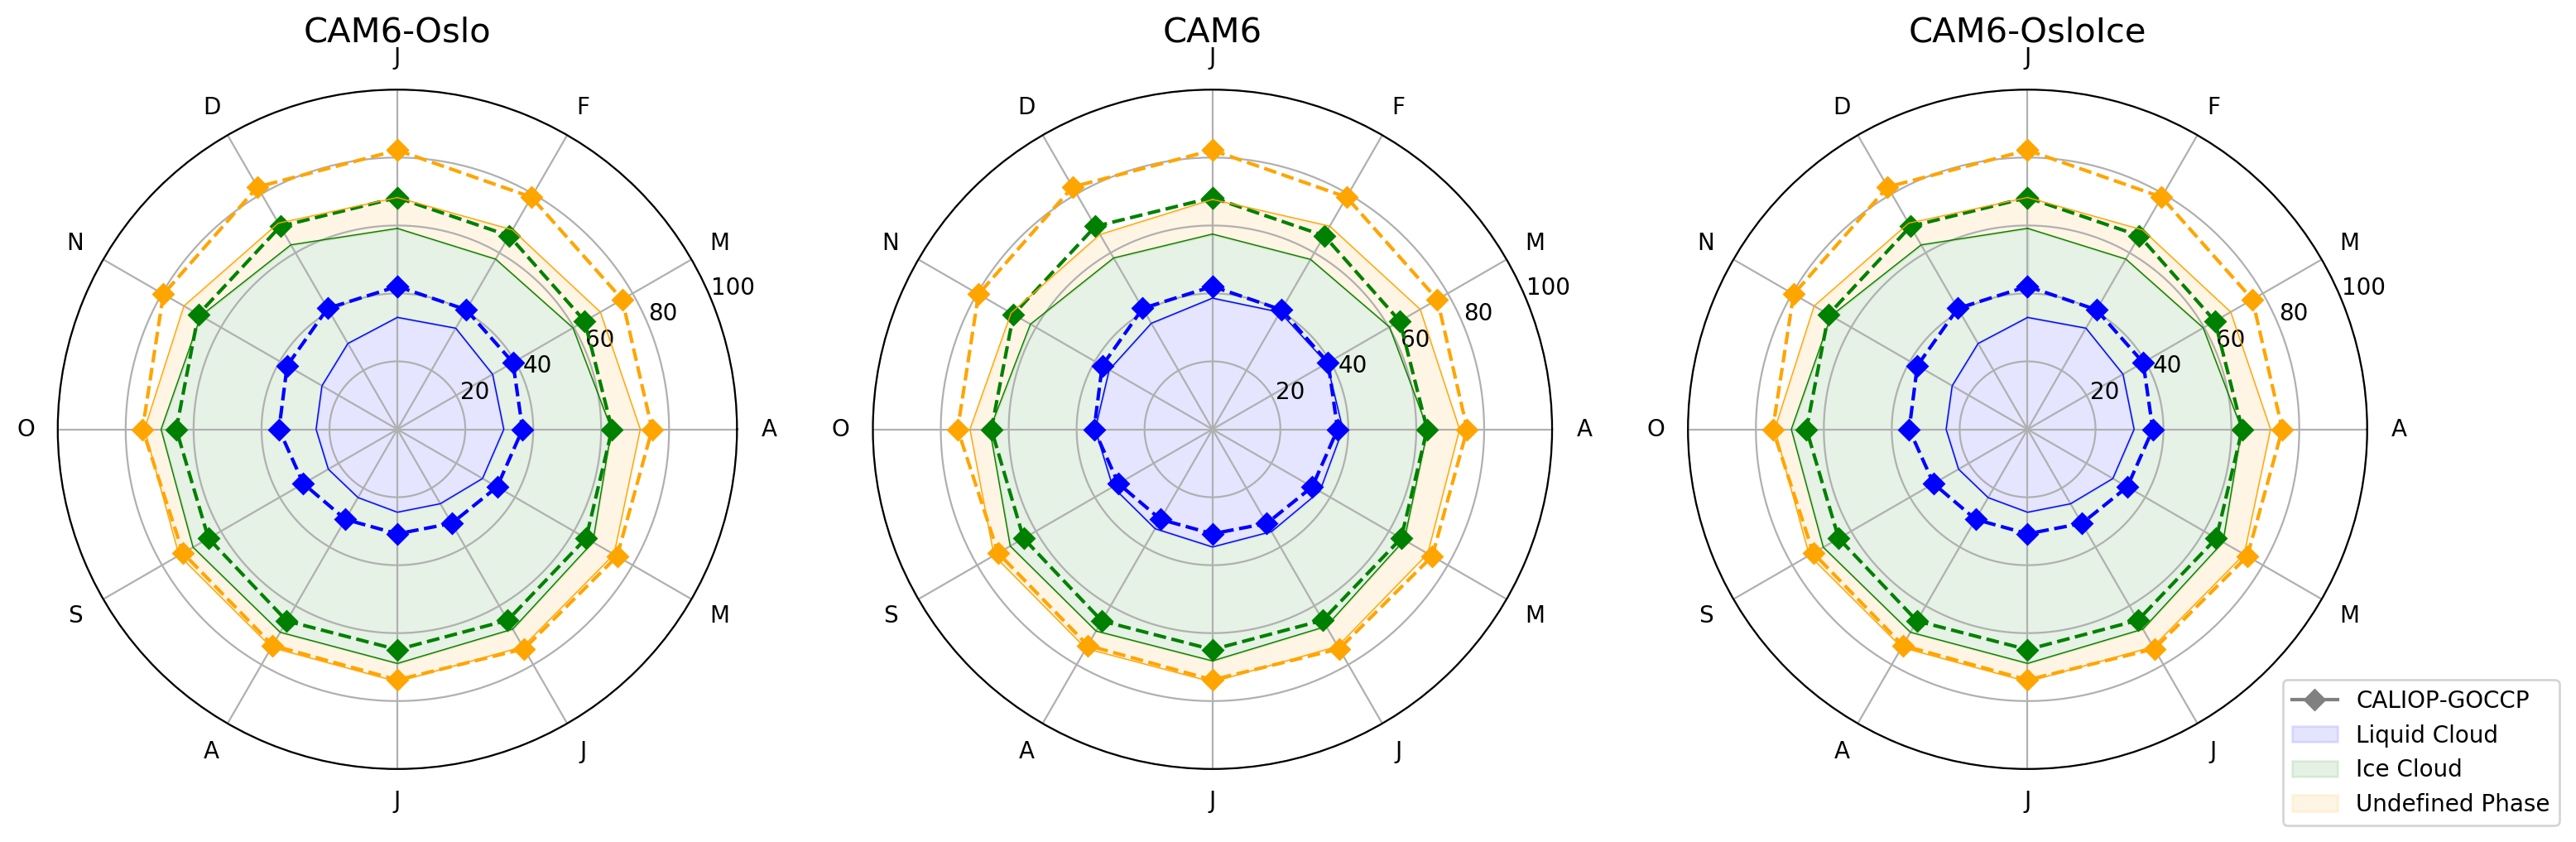

In [5]:
fig6 = basemetric.cloud_polar_plot(lat_range=[-82,-50])

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

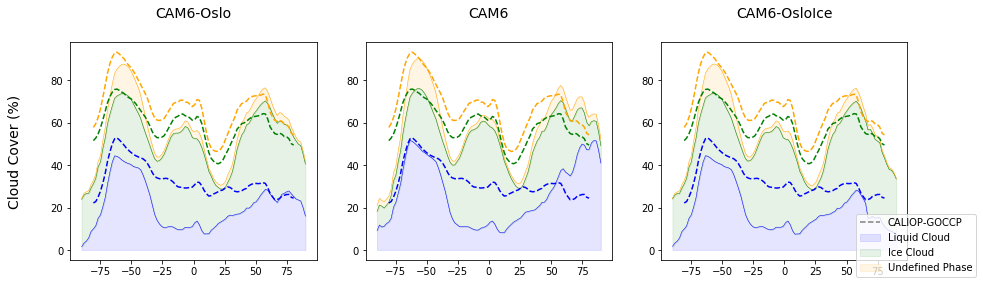

In [43]:
basemetric.plot_cloud_sum(season='DJF')

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

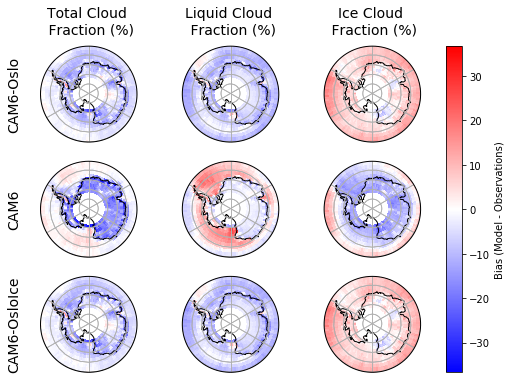

In [38]:
doop = basemetric.plot2D('CLDTOT_CAL',bias=True,projection="Antarctic", layers=True)

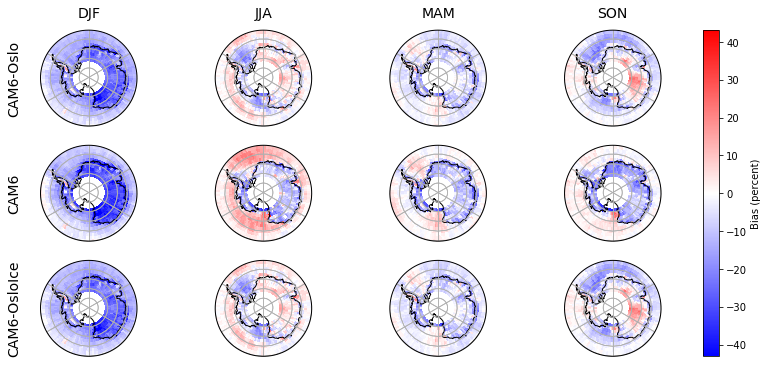

In [39]:
doop = basemetric.plot2D('CLDTOT_CAL',bias=True,projection="Antarctic", layers=False,seasonal=True)

In [36]:
filename = 'fit_circleplots2.png'
filename
if not os.path.exists(filename):
    fig6.savefig(output_dir + filename,format = 'png', dpi = 200)
    fig6.clf()

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  re

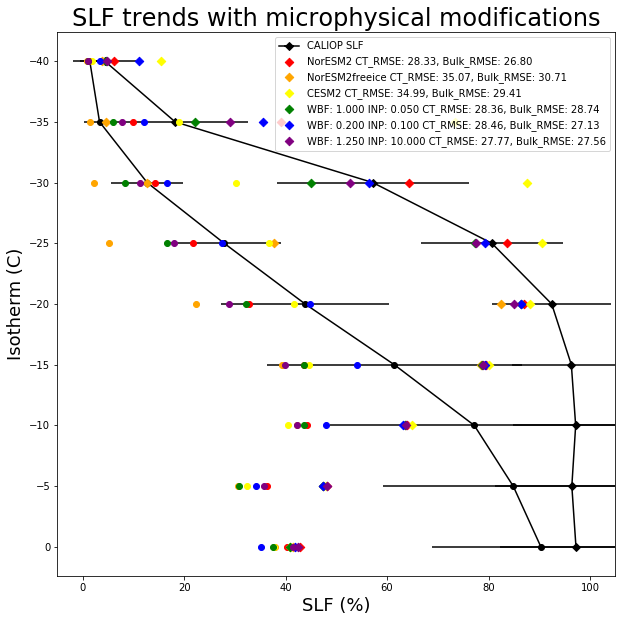

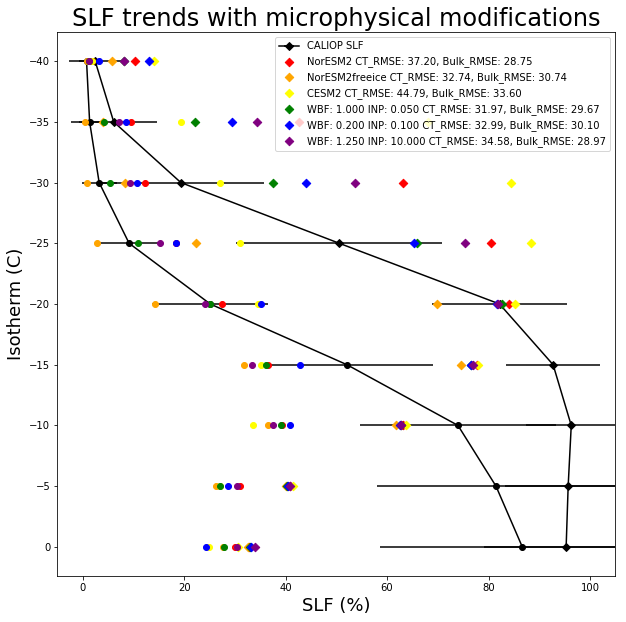

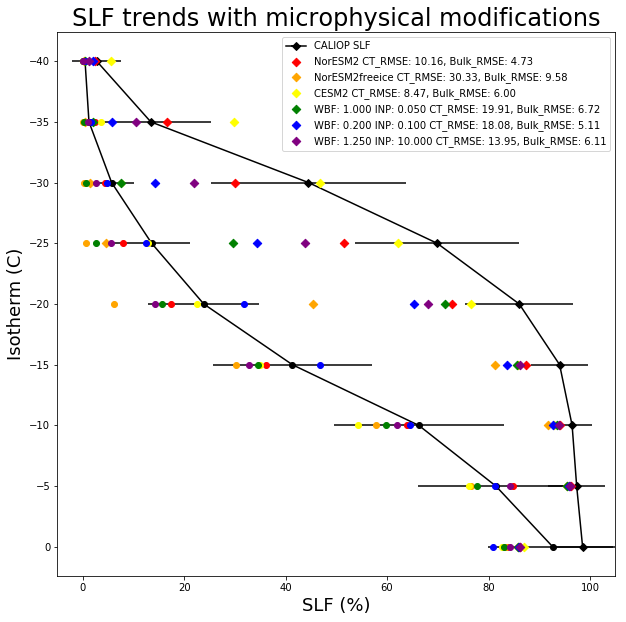

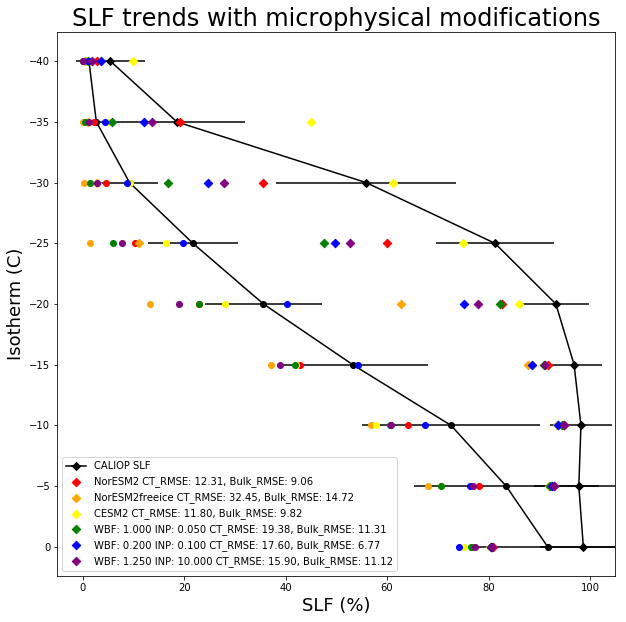

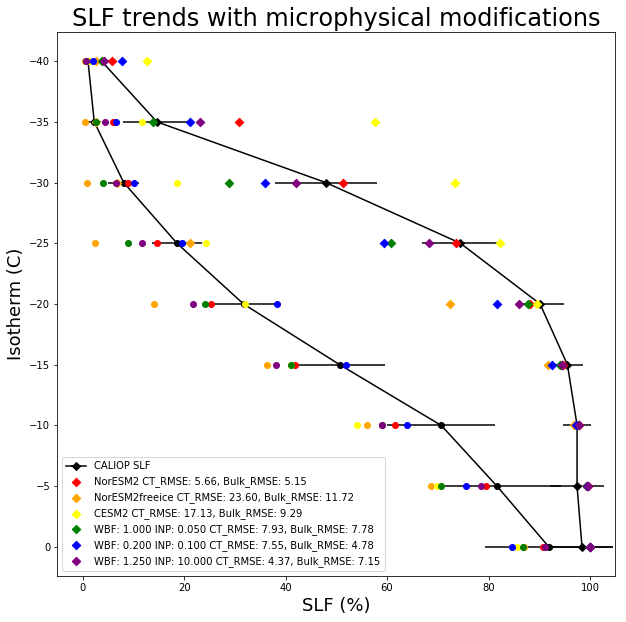

In [6]:
winter = mainmetric.plot_isos_all(season='DJF')
spring = mainmetric.plot_isos_all(season='MAM')
summer = mainmetric.plot_isos_all(season='JJA')
fall = mainmetric.plot_isos_all(season='SON')
year = mainmetric.plot_isos_all()

In [4]:
mainmetric = CT_SLF_Metric(case_dir)
# mainmetric.add_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1') # origin point

mainmetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="NorESM2")
mainmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="NorESM2freeice")
mainmetric.add_case('CESM2_slfvars', label="CESM2")
mainmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05')
mainmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1')
mainmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


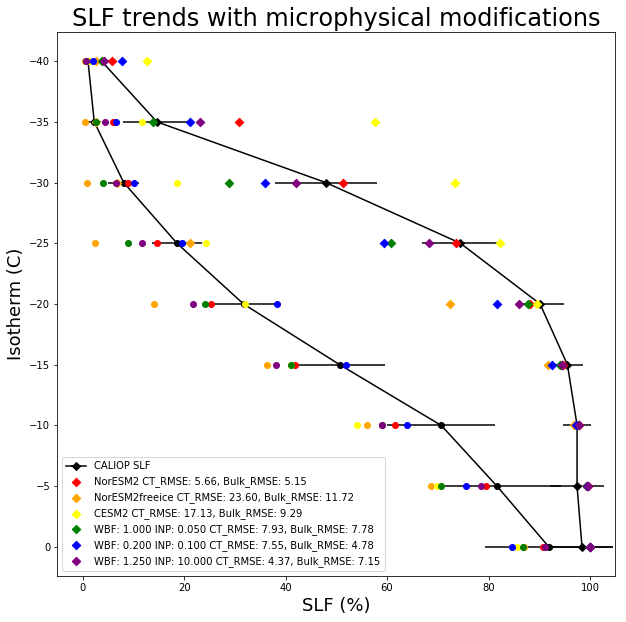

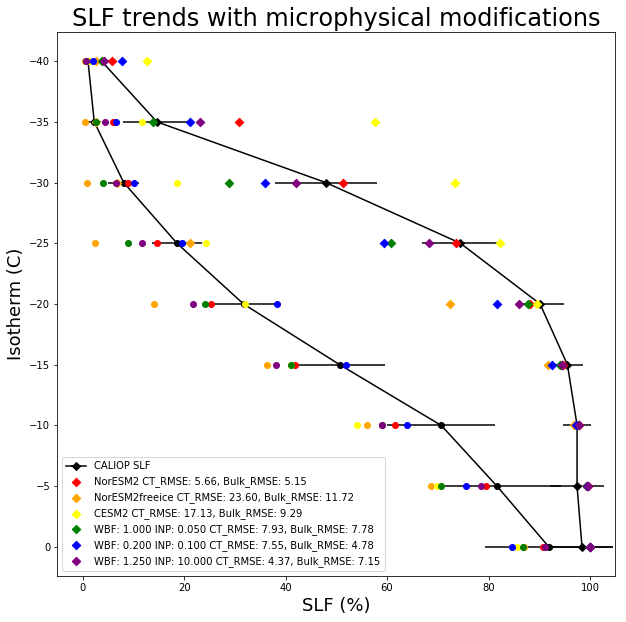

In [5]:
mainmetric.plot_isos_all()

In [15]:
for i in fitmetric.get_cases():
    print(i)
    _case = fitmetric.get_case(i)
    _da = _case.case_da
    _da = _da.sel(lat=slice(66,82))
    _da = _da.sel(lev = 850, method='nearest')
    try:
        ice_rad = _da['AREI'] / _da['FREQI']
        mean_rad = ice_rad.mean(['time','lat','lon'])
        print(mean_rad)
    except:
        pass
#     ice_rad = _case['AREI'] /

20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
<xarray.DataArray ()>
array(161.69792, dtype=float32)
Coordinates:
    lev      float64 859.5
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05
<xarray.DataArray ()>
array(133.28905, dtype=float32)
Coordinates:
    lev      float64 859.5
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
<xarray.DataArray ()>
array(112.17012, dtype=float32)
Coordinates:
    lev      float64 859.5
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
<xarray.DataArray ()>
array(123.64609, dtype=float32)
Coordinates:
    lev      float64 859.5


In [33]:
just_controls = SatComp_Metric(case_dir)
just_controls.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
just_controls.add_case('CESM2_slfvars', label="CAM6")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.


In [4]:
bob = SatComp_Metric(case_dir)

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.


In [5]:
bob.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="NorESM2")
bob.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="NorESM2freeice")
bob.add_case('CESM2_slfvars', label="CESM2")
bob.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05')
bob.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1')
bob.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
